In [28]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
%pwd

'd:\\Project\\P\\Mlops-Project\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'd:\\Project\\P\\Mlops-Project'

In [5]:
data = pd.read_csv("artifacts/data_ingestion/label_root.csv")
data

ImageID  LabelName  Confidence      XMin      XMax      YMin  \
0      a72ac22f5228e450  /m/01g317           1  0.865782  0.992625  0.442478   
1      d71c1399a5e52c93  /m/01g317           1  0.000000  1.000000  0.157080   
2      90576c0143252086  /m/01g317           1  0.696903  0.703540  0.942478   
3      447a3db76e3b25aa  /m/01g317           1  0.421829  0.458702  0.699115   
4      5a175741a2a390f3  /m/01g317           1  0.518750  0.672917  0.175000   
...                 ...        ...         ...       ...       ...       ...   
23935  a6cc7430b3c22072  /m/01g317           1  0.254758  0.289898  0.581292   
23936  a40218acab4acad7  /m/01g317           1  0.448000  0.955200  0.077551   
23937  267fb36486a00fcc  /m/01g317           1  0.000000  0.339063  0.060417   
23938  7c503e31b57fd42f  /m/01g317           1  0.497409  0.647668  0.625709   
23939  572f627b42ccd616  /m/01g317           1  0.000000  0.623894  0.185841   

           YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepictionOf  \
0      0.935841           0            0          0              0   
1      1.000000           0            0          0              0   
2      0.949853           0            0          0              0   
3      0.811947           0            0          0              0   
4      0.996875           0            0          0              0   
...         ...         ...          ...        ...            ...   
23935  0.681515           0            0          0              0   
23936  0.893878           0            0          0              0   
23937  1.000000           0            0          0              0   
23938  0.956522           0            0          0              0   
23939  0.998525           0            0          0              0   

       IsInsideOf       GenderPresentation AgePresentation  
0               0                  Unknown           Young  
1               0                  Unknown         Unknown  
2               0                  Unknown         Unknown  
3               0                  Unknown           Young  
4               0                  Unknown           Young  
...           ...                      ...             ...  
23935           0  Predominantly Masculine          Middle  
23936           0   Predominantly Feminine          Middle  
23937           0  Predominantly Masculine          Middle  
23938           0  Predominantly Masculine          Middle  
23939           0  Predominantly Masculine          Middle  

[23940 rows x 14 columns]

In [6]:
data.describe()

Confidence          XMin          XMax          YMin          YMax  \
count     23940.0  23940.000000  23940.000000  23940.000000  23940.000000   
mean          1.0      0.356735      0.645697      0.263282      0.703754   
std           0.0      0.287130      0.286354      0.220289      0.267764   
min           1.0      0.000000      0.006250      0.000000      0.009921   
25%           1.0      0.089993      0.420821      0.075904      0.494585   
50%           1.0      0.318584      0.684366      0.225000      0.742794   
75%           1.0      0.582789      0.911504      0.401563      0.988938   
max           1.0      0.995569      1.000000      0.983776      1.000000   

       IsOccluded  IsTruncated     IsGroupOf  IsDepictionOf  IsInsideOf  
count     23940.0      23940.0  23940.000000        23940.0     23940.0  
mean          0.0          0.0      0.086341            0.0         0.0  
std           0.0          0.0      0.280873            0.0         0.0  
min           0.0          0.0      0.000000            0.0         0.0  
25%           0.0          0.0      0.000000            0.0         0.0  
50%           0.0          0.0      0.000000            0.0         0.0  
75%           0.0          0.0      0.000000            0.0         0.0  
max           0.0          0.0      1.000000            0.0         0.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ImageID             23940 non-null  object 
 1   LabelName           23940 non-null  object 
 2   Confidence          23940 non-null  int64  
 3   XMin                23940 non-null  float64
 4   XMax                23940 non-null  float64
 5   YMin                23940 non-null  float64
 6   YMax                23940 non-null  float64
 7   IsOccluded          23940 non-null  int64  
 8   IsTruncated         23940 non-null  int64  
 9   IsGroupOf           23940 non-null  int64  
 10  IsDepictionOf       23940 non-null  int64  
 11  IsInsideOf          23940 non-null  int64  
 12  GenderPresentation  23940 non-null  object 
 13  AgePresentation     23940 non-null  object 
dtypes: float64(4), int64(6), object(4)
memory usage: 2.6+ MB


In [8]:
columns = data.columns.tolist()
for i in columns:
    print(f"{i} has {len(data[i].unique())} unique value")

ImageID has 7410 unique value
LabelName has 1 unique value
Confidence has 1 unique value
XMin has 9655 unique value
XMax has 9712 unique value
YMin has 8170 unique value
YMax has 7843 unique value
IsOccluded has 1 unique value
IsTruncated has 1 unique value
IsGroupOf has 2 unique value
IsDepictionOf has 1 unique value
IsInsideOf has 1 unique value
GenderPresentation has 3 unique value
AgePresentation has 4 unique value


In [9]:
def count_unique(data_frame , name_atribute : str):
    print("unique: ",data_frame[name_atribute].unique())
    print(data_frame[name_atribute].value_counts())
count_unique(data, "AgePresentation")
count_unique(data, "GenderPresentation")


unique:  ['Young' 'Unknown' 'Middle' 'Older']
Middle     11938
Unknown     9846
Young       1676
Older        480
Name: AgePresentation, dtype: int64
unique:  ['Unknown' 'Predominantly Feminine' 'Predominantly Masculine']
Unknown                    11415
Predominantly Masculine     7593
Predominantly Feminine      4932
Name: GenderPresentation, dtype: int64


### only choose ImageID, XMin, XMax, YMin, YMax

In [10]:
data_filt = data[["ImageID", "XMin", "YMin", "XMax", "YMax"]]
data_filt

ImageID      XMin      YMin      XMax      YMax
0      a72ac22f5228e450  0.865782  0.442478  0.992625  0.935841
1      d71c1399a5e52c93  0.000000  0.157080  1.000000  1.000000
2      90576c0143252086  0.696903  0.942478  0.703540  0.949853
3      447a3db76e3b25aa  0.421829  0.699115  0.458702  0.811947
4      5a175741a2a390f3  0.518750  0.175000  0.672917  0.996875
...                 ...       ...       ...       ...       ...
23935  a6cc7430b3c22072  0.254758  0.581292  0.289898  0.681515
23936  a40218acab4acad7  0.448000  0.077551  0.955200  0.893878
23937  267fb36486a00fcc  0.000000  0.060417  0.339063  1.000000
23938  7c503e31b57fd42f  0.497409  0.625709  0.647668  0.956522
23939  572f627b42ccd616  0.000000  0.185841  0.623894  0.998525

[23940 rows x 5 columns]

In [11]:
data_filt.isnull().sum()

ImageID    0
XMin       0
YMin       0
XMax       0
YMax       0
dtype: int64

In [12]:
duplicate_rows = data_filt.duplicated()
data_filt[duplicate_rows]

ImageID      XMin      YMin      XMax      YMax
56     0fa7a6957b202db5  0.000000  0.000000  1.000000  1.000000
475    821121862a35df3d  0.000000  0.000000  1.000000  1.000000
2111   01f5efed4dfda77e  0.000000  0.000000  1.000000  1.000000
2112   01f5efed4dfda77e  0.000000  0.000000  1.000000  1.000000
2147   51455d2a76eb8788  0.000000  0.000000  1.000000  1.000000
...                 ...       ...       ...       ...       ...
22321  17e348c29420e651  0.125714  0.431507  0.277143  1.000000
23796  9fd8fee180c9c9de  0.882180  0.033259  1.000000  0.507761
23830  c9e2380d7649c903  0.000000  0.000000  1.000000  1.000000
23910  539f0588f01b36a8  0.251563  0.000000  0.998438  0.997917
23921  76dcb6e2df733360  0.000000  0.000000  1.000000  1.000000

[86 rows x 5 columns]

In [13]:
data_filt = data_filt.drop_duplicates()

In [14]:
data_filt

ImageID      XMin      YMin      XMax      YMax
0      a72ac22f5228e450  0.865782  0.442478  0.992625  0.935841
1      d71c1399a5e52c93  0.000000  0.157080  1.000000  1.000000
2      90576c0143252086  0.696903  0.942478  0.703540  0.949853
3      447a3db76e3b25aa  0.421829  0.699115  0.458702  0.811947
4      5a175741a2a390f3  0.518750  0.175000  0.672917  0.996875
...                 ...       ...       ...       ...       ...
23935  a6cc7430b3c22072  0.254758  0.581292  0.289898  0.681515
23936  a40218acab4acad7  0.448000  0.077551  0.955200  0.893878
23937  267fb36486a00fcc  0.000000  0.060417  0.339063  1.000000
23938  7c503e31b57fd42f  0.497409  0.625709  0.647668  0.956522
23939  572f627b42ccd616  0.000000  0.185841  0.623894  0.998525

[23854 rows x 5 columns]

In [15]:
XMin = data_filt["XMin"]
XMax = data_filt["XMax"]
YMax = data_filt["YMax"]
YMin = data_filt["YMin"]
data_filt['BoundingBox'] = data_filt.apply(lambda row: [row['XMin'], row['YMin'], row['XMax'], row['YMax']], axis=1)

C:\Users\TrungTD\AppData\Local\Temp\ipykernel_7480\2981924686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filt['BoundingBox'] = data_filt.apply(lambda row: [row['XMin'], row['YMin'], row['XMax'], row['YMax']], axis=1)


In [16]:
data_filt[["ImageID", "BoundingBox"]]

ImageID                               BoundingBox
0      a72ac22f5228e450  [0.865782, 0.442478, 0.992625, 0.935841]
1      d71c1399a5e52c93                  [0.0, 0.15708, 1.0, 1.0]
2      90576c0143252086   [0.696903, 0.942478, 0.70354, 0.949853]
3      447a3db76e3b25aa  [0.421829, 0.699115, 0.458702, 0.811947]
4      5a175741a2a390f3      [0.51875, 0.175, 0.672917, 0.996875]
...                 ...                                       ...
23935  a6cc7430b3c22072  [0.254758, 0.581292, 0.289898, 0.681515]
23936  a40218acab4acad7       [0.448, 0.077551, 0.9552, 0.893878]
23937  267fb36486a00fcc            [0.0, 0.060417, 0.339063, 1.0]
23938  7c503e31b57fd42f  [0.497409, 0.625709, 0.647668, 0.956522]
23939  572f627b42ccd616       [0.0, 0.185841, 0.623894, 0.998525]

[23854 rows x 2 columns]

[0.020478, 0.095602, 0.329352, 0.665392]
[9.41988, 43.97692, 151.50191999999998, 306.08032]
[9, 44, 152, 306]


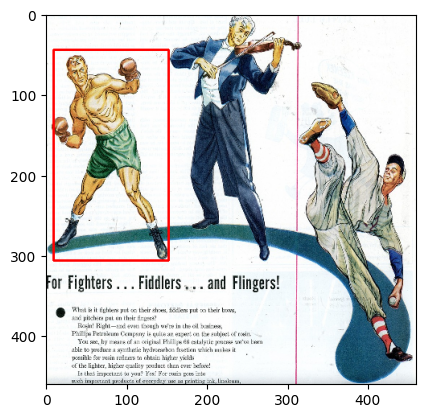

[0.0, 0.0, 0.591176, 0.997783]
[0.0, 0.0, 271.94096, 458.98017999999996]
[0, 0, 272, 459]


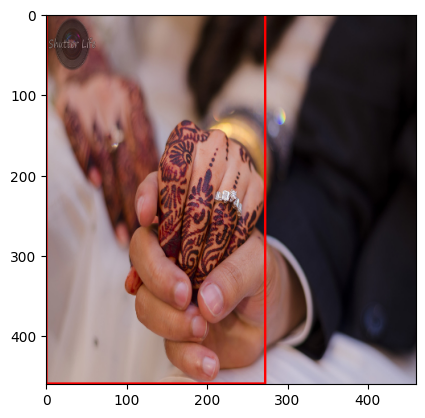

[0.307692, 0.148092, 0.688034, 0.796947]
[141.53832, 68.12232, 316.49564000000004, 366.59562]
[142, 68, 316, 367]


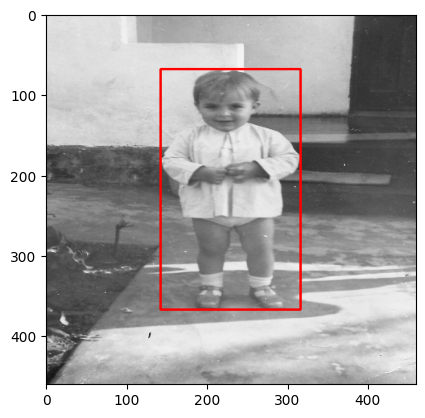

[0.0, 0.164583, 0.176563, 1.0]
[0.0, 75.70818, 81.21898, 460.0]
[0, 76, 81, 460]


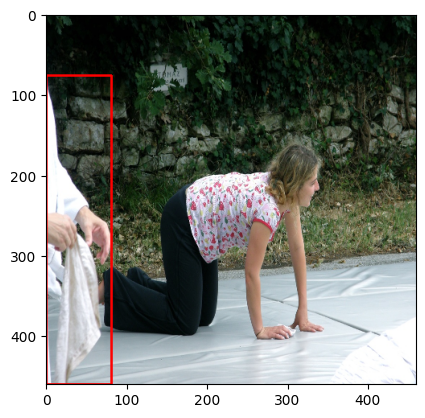

[0.0, 0.116667, 0.895312, 1.0]
[0.0, 53.66682, 411.84352, 460.0]
[0, 54, 412, 460]


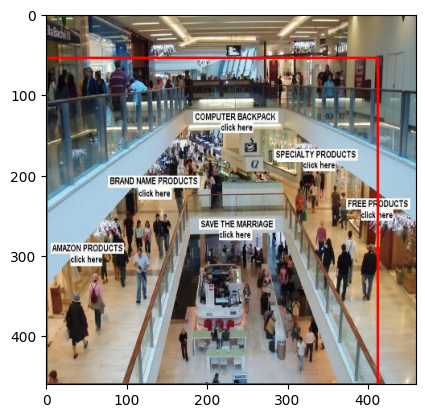

[0.253669, 0.228616, 0.48218, 0.688958]
[116.68773999999999, 105.16336000000001, 221.8028, 316.92068]
[117, 105, 222, 317]


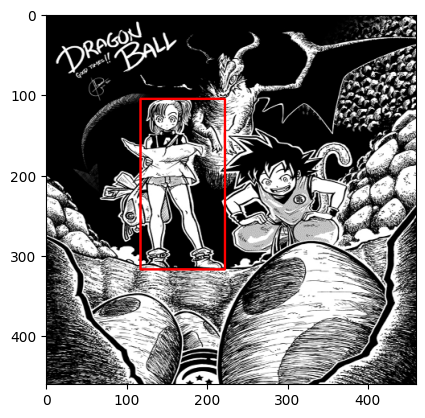

[0.0875, 0.269311, 0.132812, 0.39666]
[40.25, 123.88306000000001, 61.093520000000005, 182.4636]
[40, 124, 61, 182]


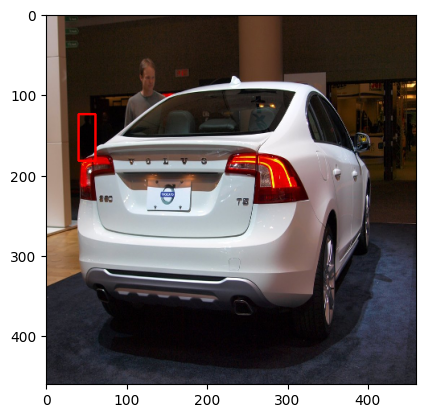

[0.379358, 0.628505, 0.393305, 0.71028]
[174.50467999999998, 289.1123, 180.9203, 326.72880000000004]
[175, 289, 181, 327]


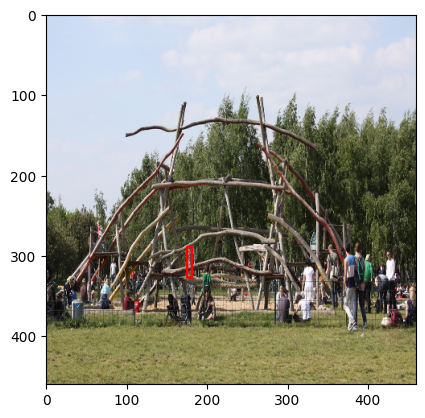

[0.193215, 0.0, 0.429204, 0.55531]
[88.8789, 0.0, 197.43383999999998, 255.4426]
[89, 0, 197, 255]


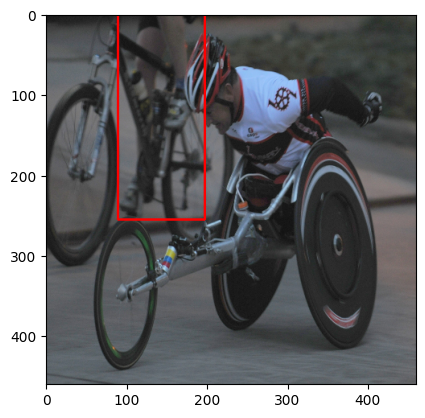

[0.0, 0.221239, 0.393805, 1.0]
[0.0, 101.76993999999999, 181.15030000000002, 460.0]
[0, 102, 181, 460]


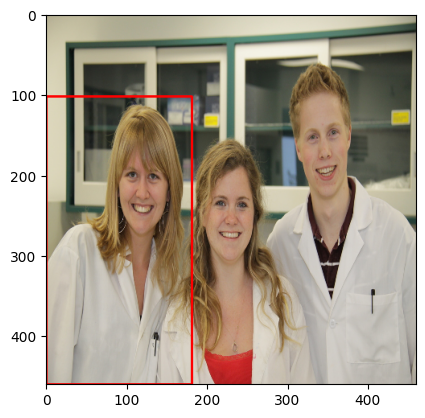

[0.675, 0.2375, 0.753125, 0.552083]
[310.5, 109.25, 346.4375, 253.95818]
[310, 109, 346, 254]


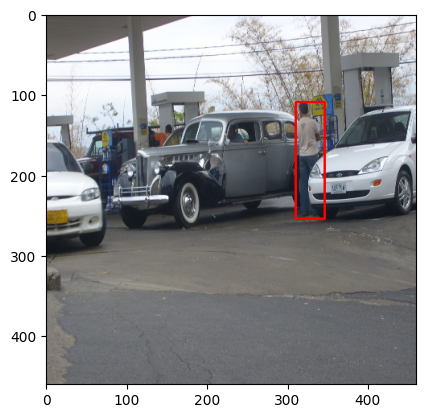

[0.042647, 0.0, 0.955882, 1.0]
[19.61762, 0.0, 439.70572, 460.0]
[20, 0, 440, 460]


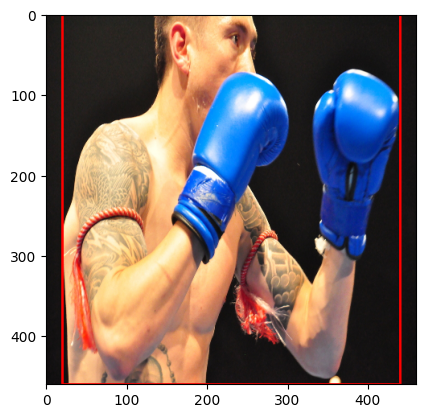

[0.466863, 0.432373, 0.4919, 0.472284]
[214.75698, 198.89158, 226.274, 217.25064]
[215, 199, 226, 217]


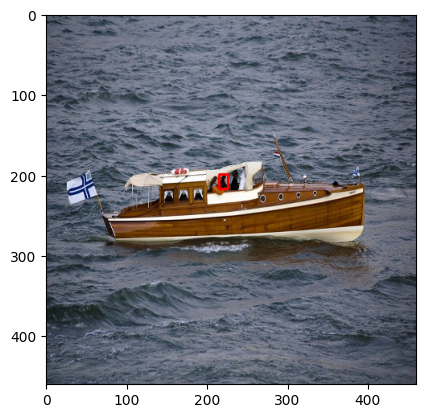

[0.415625, 0.445833, 0.439063, 0.50625]
[191.1875, 205.08318, 201.96898, 232.875]
[191, 205, 202, 233]


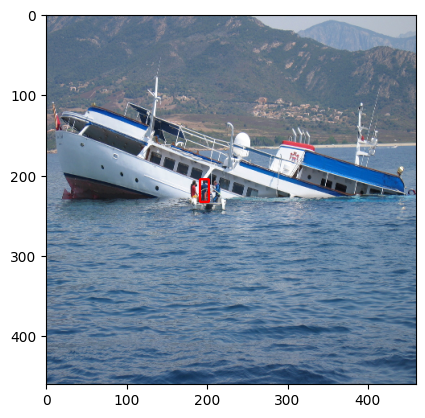

[0.373437, 0.466667, 0.482812, 0.8375]
[171.78102, 214.66682, 222.09352, 385.25]
[172, 215, 222, 385]


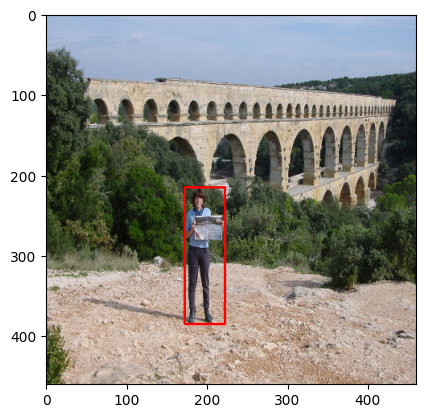

[0.0, 0.0, 1.0, 1.0]
[0.0, 0.0, 460.0, 460.0]
[0, 0, 460, 460]


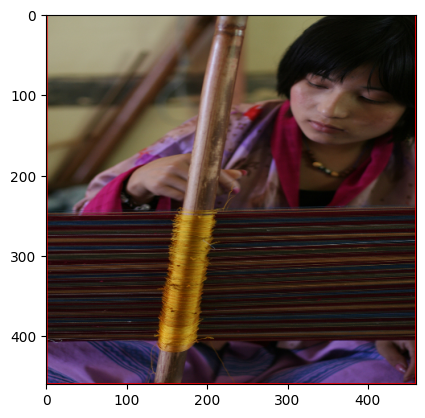

[0.724252, 0.0, 0.938538, 0.504912]
[333.15592, 0.0, 431.72748, 232.25952]
[333, 0, 432, 232]


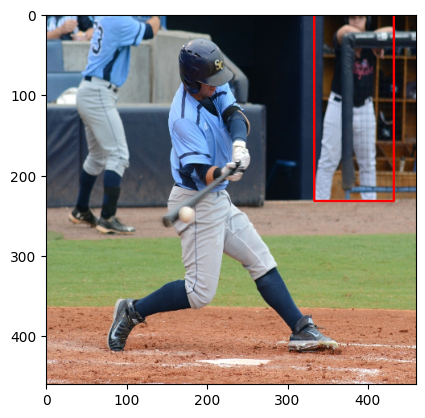

[0.0, 0.316667, 0.1125, 1.0]
[0.0, 145.66682, 51.75, 460.0]
[0, 146, 52, 460]


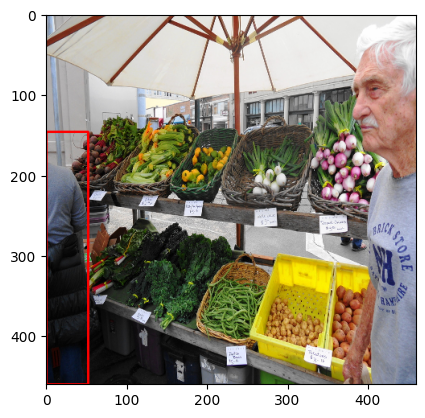

[0.50295, 0.176991, 0.629794, 0.504425]
[231.357, 81.41586000000001, 289.70524, 232.0355]
[231, 81, 290, 232]


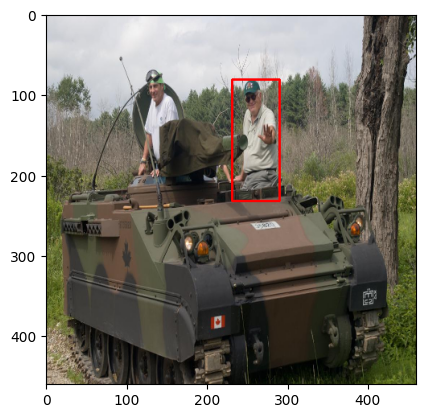

[0.0, 0.223438, 0.160417, 0.607813]
[0.0, 102.78148, 73.79182, 279.59398000000004]
[0, 103, 74, 280]


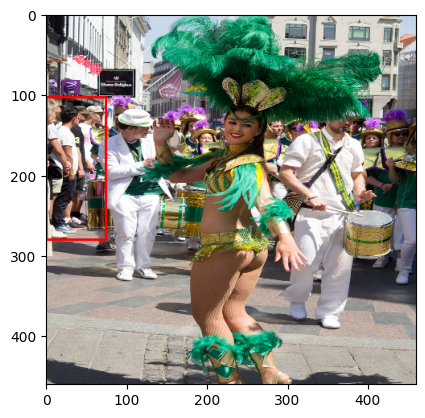

In [20]:
list_image = data_filt["ImageID"].tolist()
bboxs = data_filt["BoundingBox"].tolist()
path = "artifacts/data_ingestion/image/"
i =0 
for file in os.listdir(path):
    if file[:-4] in list_image:
        i += 1
        index = list_image.index(file[:-4])
        img = cv2.imread(path + file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        s = img.shape
        bbox = bboxs[index] # xmin, xmax, ymin, ymax
        print(bbox)
        bbox = [bbox[0] * 460, bbox[1] * 460, bbox[2] *460  , bbox[3]  * 460]
        print(bbox)
        bbox = [round(val) for val in bbox]  
        print(bbox)
        img = cv2.rectangle((cv2.resize(img, (460,460), interpolation=cv2.INTER_CUBIC)),(bbox[0], bbox[1]), (bbox[2] , bbox[3]), thickness = 2, color = (255,0,0))
        plt.imshow(img)
        plt.show()
    if i == 20:
        break

In [22]:
import os
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True) #1 class immutable
class DataValidation_PreprocessConfig:
    root_dir: Path
    STATUS_FILE: str
    label_root_data: Path
    label_process_data: Path
    image_root_data: Path
    image_process_data: Path
    choose_schema: dict

In [23]:
from MLOps_project.constant import *
from MLOps_project.utils.common import read_yaml, create_directories

class ConfigurationManager: # manage: read and use files config
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])
    def get_data_validation_config(self) -> DataValidation_PreprocessConfig:
        config = self.config.data_validation_and_preprocess
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidation_PreprocessConfig(
            root_dir = config.root_dir,
            STATUS_FILE= config.STATUS_FILE,
            label_root_data = config.label_root_data,
            label_process_data = config.label_process_data,
            image_root_data= config.image_root_data,
            image_process_data= config.image_process_data,
            choose_schema = schema
        )
        return data_validation_config

In [36]:
import os
from MLOps_project import logger
from MLOps_project.utils.common import get_size

In [31]:
class DataValidation_Preprocess:
    def __init__(self, config: DataValidation_PreprocessConfig):
        self.config = config
        self.data = None
    
    def open_csv(self):
        self.data = pd.read_csv(self.config.label_root_data)
        return self.data
    def validate_columns(self)-> bool:
        try:
            all_cols = list(self.data.columns)

            validation_status = None
            choose_schema = self.config.choose_schema.keys()

            for col in all_cols:
                if col not in choose_schema:
                    validation_status = 0
                    with open(self.config.STATUS_FILE, 'a') as f:
                        f.write(f"Validation status of choose{col} for schema: {validation_status}\n")
                else:
                    validation_status = 1
                    with open(self.config.STATUS_FILE, 'a') as f:
                        f.write(f"VaValidation status of choose{col} for schema: {validation_status}\n")
            return validation_status, self.data
        
        except Exception as e:
            raise e
    def drop_duplicate(self):
        try:
            self.data = self.data.drop_duplicates()
            self.data = self.data.dropna()
            output_folder = os.path.dirname(self.config.label_process_data)
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)
            self.data.to_csv(self.config.label_process_data, index=False)
        except Exception as e:
            raise e
    def process_image(self):
        try:
            path = os.path.join(self.config.image_root_data)
            destination = os.path.dirname(self.config.image_process_data)
            if not os.path.exists(destination):
                os.makedirs(destination)
            else:
                logger.info(f"File already exists of size: {get_size(Path(self.config.image_process_data))}")
            destination = os.path.join(self.config.image_process_data)
            for file in os.listdir(path):
                image = cv2.imread(path + file)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (240,180))
                image = Image.fromarray(image)
                image.save(os.path.join(destination, file))
            validation_process_status = 1
            with open(self.config.STATUS_FILE, 'a') as f:
                f.write(f"process resize image: {validation_process_status}")
        except Exception as e:
            raise e

In [34]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation_process = DataValidation_Preprocess(config=data_validation_config)
    data_validation_process.open_csv()
    data_validation_process.validate_columns()
    data_validation_process.drop_duplicate()
    data_validation_process.process_image()
except Exception as e:
    raise e

[2023-12-19 16:31:42,411: INFO: common: yaml file: config\config.yaml loaded successfully]
[2023-12-19 16:31:42,414: INFO: common: yaml file: params.yaml loaded successfully]
[2023-12-19 16:31:42,415: INFO: common: yaml file: schema.yaml loaded successfully]
[2023-12-19 16:31:42,417: INFO: common: created directory at: artifacts]
[2023-12-19 16:31:42,419: INFO: common: created directory at: artifacts/data_validation]


In [ ]:
import tensorflow as tf

# Tạo tập dữ liệu đào tạo
train_dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
train_dataset = train_dataset.shuffle(buffer_size=1000)
train_dataset = train_dataset.batch(batch_size=32)

# Tạo mô hình
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

# Khởi tạo tham số
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Đào tạo mô hình
model.fit(train_dataset, epochs=10)

# Đánh giá mô hình
model.evaluate(test_dataset)